# Homework 2: Univariate Statistics

### The total score for this assignment will be 80 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 60 pt: Homework questions. 

## 0. Download the data from: 

* [https://www.kaggle.com/mylesoneill/world-university-rankings](https://www.kaggle.com/mylesoneill/world-university-rankings)

There are three rankings of universities included in the dataset: Center for World University Rankings (*CWUR*), Times Higher Education World University Rankings (*Times*), and Academic Ranking of World Universities (ARWU, or *Shanghai*).

Look at the column descriptions on the Kaggle page. Note that for some columns, there may be some missing values or values that may need some munging in order for your analysis to succeed. **Be sure to look at the values in the columns you work with using `describe()`**—if data are missing or nonsensical, this may suggest that you need to take extra steps to read them in properly.

## 1. Answer the questions below. 
- Write your Python code that can answer the following questions, and
- Explain your answers in plain English. 

### For 10 Points: Compare the distributions of the scores across the three rankings

* Plot histograms and boxplots (or any other plots that you think to be helpful) for the overall scores for the CWUR, Times, and Shanghai rankings. What can you say about them?

In [1]:
MY_UNIQNAME = 'shruthis'

Collaborated with austinam, iviev, and dimac.

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

cwur_df = pd.read_csv("data/cwurData.csv")
cwur_df
cwur_world_rank_sort = cwur_df.sort_values(['world_rank'])  #sorts by world rank ascending, then by score descending
# cwur_world_rank_sort.groupby(['year']).describe()
scores_2012 = cwur_df[cwur_df.year==2012]['score']
scores_2012.describe()
# sns.distplot(scores_2012, rug=True);

# cwur_world_rank_sort = cwur_table.sort_values(['world_rank']).sort_values(['score'], ascending= False)  #sorts by world rank ascending, then by score descending
# cwur_world_rank_sort




count    100.000000
mean      54.940900
std       12.619271
min       43.360000
25%       46.650000
50%       50.150000
75%       59.165000
max      100.000000
Name: score, dtype: float64

In [3]:
def multiplePlots( series ):
    
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)

    # Histogram
    sns.distplot(series, ax=axs[0,0])
    
    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current,lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")
    
    # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(xr,qntls, ax=axs[1,0])
    
    # Run sequence
    ax = sns.regplot(np.arange(len(series)),series, ax=axs[1,1])
    ax.set_ylabel("val")
    ax.set_xlabel("i")


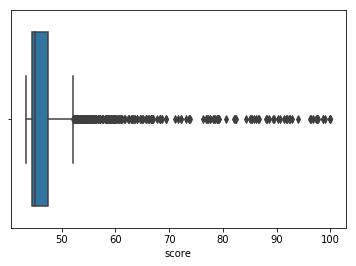

In [4]:
sns.boxplot(cwur_df['score']);

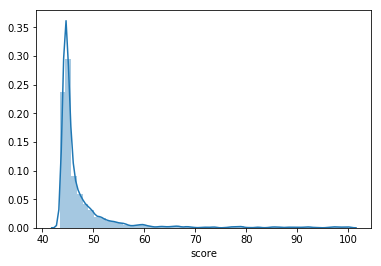

In [5]:
sns.distplot(cwur_df['score']);

In [6]:
cwur_df['score'].describe()

count    2200.000000
mean       47.798395
std         7.760806
min        43.360000
25%        44.460000
50%        45.100000
75%        47.545000
max       100.000000
Name: score, dtype: float64

The CWUR data does not follow a normal distribution -- it is significantly skewed to the right, based on the tails noted in the histogram and the boxplot. This is likely due to a high number of outliers, as plotted in the boxplot. The CWUR data had a mean score of 47.7, with a median of 45.1 and standard deviation of 7.76. Since the mean is greater than the median, this also supports that the data follows a skewed right distribution. The scores range from 43.3 to 100.0.

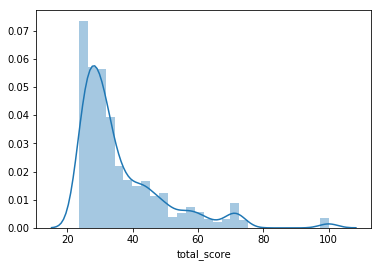

In [7]:
shanghai_df = pd.read_csv("data/shanghaiData.csv")
shanghai_df

shanghai_df['world_rank'] = shanghai_df['world_rank'].str.split('-')
shanghai_df['world_rank'] = shanghai_df['world_rank'].apply(lambda x:x[0])

shanghai_df['national_rank']=shanghai_df['national_rank'].astype(str)
shanghai_df['national_rank'] = shanghai_df['national_rank'].str.split('-')
shanghai_df['national_rank'] = shanghai_df['national_rank'].apply(lambda x:x[0])
        
shanghai_df.head(450)

shanghai_scores_num = np.array(shanghai_df['total_score']).astype(np.float)
shanghai_scores_num

# sns.boxplot(shanghai_df['total_score'].dropna())

sns.distplot(shanghai_df['total_score'].dropna())





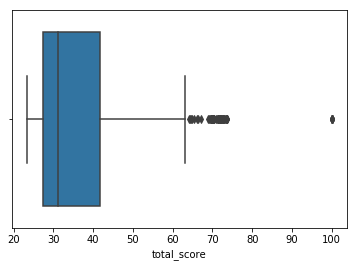

In [8]:
sns.boxplot(shanghai_df['total_score'].dropna())

In [9]:
shanghai_df["total_score"].describe()

count    1101.000000
mean       36.383470
std        13.557186
min        23.500000
25%        27.400000
50%        31.300000
75%        41.800000
max       100.000000
Name: total_score, dtype: float64

The distribution of the Shanghai Total Score data is also skewed to the right, based on the histogram and box plots, with a mean of 36.38 and a median 31.3. The mean is lower for this data set than for the other two data sets. The data set has minimum score of 23.5 and a maximum score of 100.0, which is a wider spread compared to the other data sets as well, despite the majority of the schools (75%) scoring at or below 41.8. There were also several outlier scores noted.


In [10]:
times_df = pd.read_csv("data/timesData.csv")
times_df
# print(times_df.dtypes)
times_df['world_rank'] = times_df['world_rank'].str.split('-')
times_df['world_rank'] = times_df['world_rank'].apply(lambda x:x[0])

# times_df.head(450)
        
# shanghai_df.head(200)

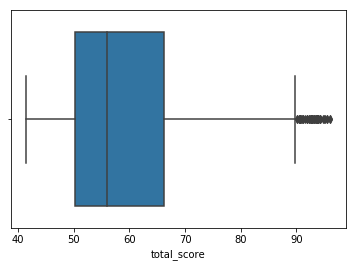

In [11]:
times_scores = times_df['total_score']
times_scores = times_scores.replace('-','NaN')
times_df_num = np.array(times_scores).astype(np.float)
times_df['total_score']=times_df_num
sns.boxplot(x= times_df['total_score'])
# times_scores

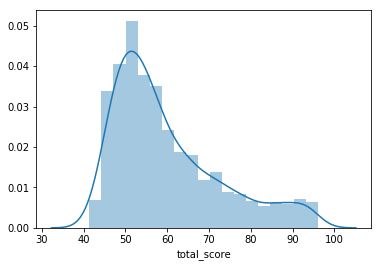

In [12]:
sns.distplot(times_df['total_score'].dropna())

In [13]:
times_df["total_score"].describe()

count    1201.000000
mean       59.846128
std        12.803446
min        41.400000
25%        50.300000
50%        56.000000
75%        66.200000
max        96.100000
Name: total_score, dtype: float64

The distribution of the Times total score data is also skewed to the right, based on the histogram and box plots. The data has a mean of 59.8, the highest of all three data sets, and a median of 56.0. The data set has a minimum score of 41.4 and a maximum of 96.1. It is interesting to note that this is the only data set that did not have a maximum score of 100.0. The distrubution of this data is not as skewed as the other 2 data sets, since 75% of the schools scored at or below 66.2, which is a higher quartile value than the other 2 data sets. The outliers in this data set occurred over a smaller range than the other 2 data sets as well, based on the box plot.


In [14]:
print(sns.__version__)

0.9.0


(Use this space to explain your answers)

### For 10 Points: Using the Times data, look at the number of students (`num_students` column) for all universities in 2015.

* Plot the distribution using the `multiplePlots` function from Lab 3. What does it look like?
* Compare the mean and median. Are they similar or different, and why?
* Which school has the most students?

In [15]:
times_df['num_students'] = times_df['num_students'].str.replace(',','')
times_df
times_2015 = times_df[times_df.year==2015]
times_2015.head()


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1402,1,California Institute of Technology,United States of America,92.2,67.0,98.1,99.7,89.1,94.3,2243,6.9,27%,33 : 67,2015
1403,2,Harvard University,United States of America,92.9,67.6,98.6,98.9,44.0,93.3,20152,8.9,25%,NaN,2015
1404,3,University of Oxford,United Kingdom,88.6,90.7,97.7,95.5,72.9,93.2,19919,11.6,34%,46 : 54,2015
1405,4,Stanford University,United States of America,91.5,69.0,96.7,99.1,63.1,92.9,15596,7.8,22%,42 : 58,2015
1406,5,University of Cambridge,United Kingdom,89.7,87.8,95.6,95.2,51.1,92.0,18812,11.8,34%,46 : 54,2015


In [16]:
times_2015["num_students"].astype(float).dropna().describe()

count       390.000000
mean      23638.576923
std       14834.339363
min         462.000000
25%       12566.500000
50%       21086.500000
75%       30114.250000
max      120986.000000
Name: num_students, dtype: float64

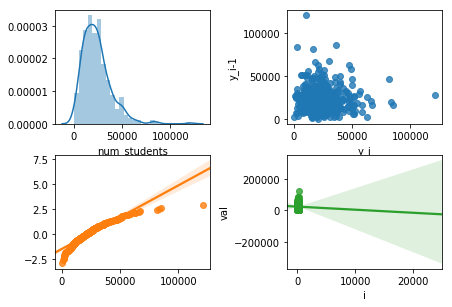

In [17]:
multiplePlots(times_2015['num_students'].astype(float).dropna())

The distribution of the variable "num_students" is a right-skewed distribution, based on the histogram plot. The distribution has a mean of 23,638 students and a standard deviation of 14,834. The minimum number of students is 462, the max number is 120,986, and the median is 21,086 students. Since the mean is greater than the median, this also indicates a skewed right distribution, and this is likely due to a significant number of outliers.

The QQ plot does not show a normal distribution since the distribution of the data points against the line shows a clear right tail. Based on the lag plot, the randomness assumption appears to hold, however the presence of outliers indicates a clustering. The run sequence also shows a skewed distribution around the line, since there is a slight slope to the plot and the distribution of the data points is not even around the line, which also indicates a skewed distribution.

In [18]:
times_2015[times_2015.num_students=='120986']


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1722,301,Sapienza University of Rome,Italy,32.3,37.5,28.1,50.7,34.2,NaN,120986,32.3,7%,59 : 41,2015


The Sapienza University of Rome had the most number of students in 2015, with 120986 students in total.

### For 10 points: Using the Times data, compare the international outlook scores (`international` column) for universities in the US versus universities outside the US.

* Plot their distributions for 2011 and describe them. Identify their their mean and median.
* Repeat this for 2016. Has the result changed?

In [19]:
times_inter = times_df['international']
times_inter = times_inter.replace('-','NaN')
times_inter_num = np.array(times_inter).astype(np.float)
times_df['international']=times_inter_num
times_df.head()
times_2011_usa = times_df[(times_df.year == 2011) 
    & (times_df.country == 'United States of America')]
times_2011_int = times_df[(times_df.year == 2011) 
    & (times_df.country != 'United States of America')]

times_2016_usa = times_df[(times_df.year == 2016) 
    & (times_df.country == 'United States of America')]
times_2016_int = times_df[(times_df.year == 2016) 
    & (times_df.country != 'United States of America')]



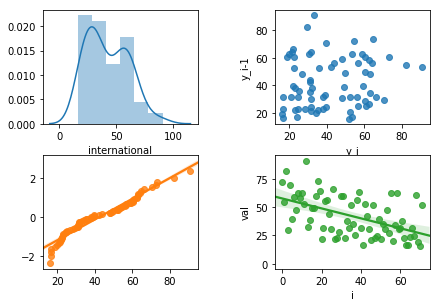

In [20]:
multiplePlots(times_2011_usa['international'].astype(float).dropna())

In [21]:
times_2011_usa['international'].astype(float).dropna().describe()

count    72.000000
mean     42.230556
std      18.120478
min      15.900000
25%      26.400000
50%      38.600000
75%      57.000000
max      90.900000
Name: international, dtype: float64

The distribution of 2011 international outlook scores for US universities appears to follow a bimodal distribution, per the histogram. The international score data has a mean of 42.2 and a median of 38.6. Since the mean is slightly greater than the median, this indicates the data is also slightly skewed to the right.

Per the lag plot, the randomness assumption does hold since there is no clear pattern to the distribution. Since the run sequence does have a slope, this indicates that distribution is not normal as well.

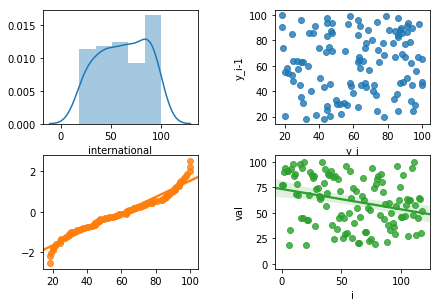

In [22]:
multiplePlots(times_2011_int['international'].astype(float).dropna())

In [23]:
times_2011_int['international'].astype(float).dropna().describe()

count    119.000000
mean      61.502521
std       24.147086
min       18.400000
25%       43.600000
50%       63.200000
75%       84.750000
max      100.000000
Name: international, dtype: float64

The distribution of 2011 international outlook scores for universities outside of the US appears to follow a slightly left-skewed distribution, per the histogram. The international score data has a mean of 61.5 and a median of 63.2. Since the mean is slightly lower than the median, this also supports that the data is  slightly skewed to the left. The mean and median for international schools is noticably higher than the mean and median for US schools for 2011.

Per the lag plot, the randomness assumption does hold since there is no clear pattern to the distribution. Since the run sequence does have a slope, this also indicates that distribution is not normal.

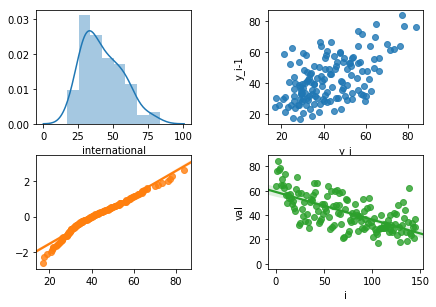

In [24]:
multiplePlots(times_2016_usa['international'].astype(float).dropna())

In [25]:
times_2016_usa['international'].astype(float).dropna().describe()

count    146.000000
mean      42.431507
std       14.407119
min       17.100000
25%       30.625000
50%       40.200000
75%       52.925000
max       84.000000
Name: international, dtype: float64

The distribution of 2016 international outlook scores for US universities appears to follow a skewed-right distribution, per the histogram and the QQ plot (which has right-sided tails). The international score data has a mean of 42.4 and a median of 40.2. Since the mean is slightly greater than the median, this indicates the data is also slightly skewed to the right. The mean did not change significantly from 2011 to 2016 for US universities, however the median did increase slightly.

Per the lag plot, the randomness assumption does not hold since there is a clear upward trend to the distribution. Since the run sequence does have a clear slope, this indicates that distribution is not normal as well.

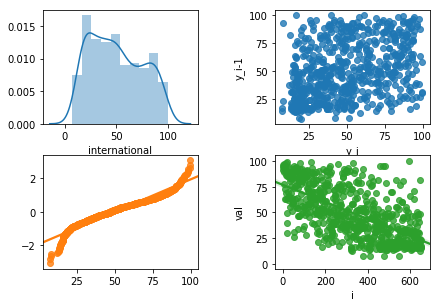

In [26]:
multiplePlots(times_2016_int['international'].astype(float).dropna())

In [27]:
times_2016_int['international'].astype(float).dropna().describe()

count    654.000000
mean      49.855199
std       25.111324
min        7.100000
25%       27.700000
50%       47.000000
75%       70.900000
max       99.900000
Name: international, dtype: float64

The distribution of 2016 international outlook scores for non-US universities appears to follow a skewed right distribution, per the histogram. The international score data has a mean of 49.9 and a median of 47.0. Since the mean is slightly greater than the median, this also indicates the data is slightly skewed to the right. The mean and median international outlook scores for international universities is significantly less than the 2011 scores, with the mean dropping from 61.5.

Per the lag plot, the randomness assumption does hold since there is no clear pattern to the distribution. Since the run sequence does have a downward slope, this indicates that distribution is not normal as well.

### For 10 Points: Using the data for the CWUR rankings, investigate how the rankings change over time.

* Which universities consistently appear in the rankings, and which aren't?
* Which universities are rising, falling, or stationary in rank over the years?
* Plot the results, and explain your answers

It might be more intuitive to compare the scores rather than the ranks directly. Feel free to do this if it's the case.

In [28]:
cwur_df
cwur_top_100 = cwur_df[(cwur_df.world_rank<101)]
cwur_pvt = cwur_top_100.pivot(index='institution', columns='year', values='score')
cwur_pvt



year,2012,2013,2014,2015
institution,,,,
Arizona State University,45.70,46.72,NaN,51.13
Australian National University,NaN,44.50,NaN,NaN
Boston University,48.31,48.96,53.96,53.43
Brown University,47.91,46.43,52.92,52.01
California Institute of Technology,85.21,77.59,85.50,84.40
Carnegie Mellon University,51.60,49.56,55.30,54.00
Case Western Reserve University,46.11,NaN,NaN,NaN
Columbia University,78.86,88.21,97.41,96.14
Cornell University,73.69,76.99,85.80,86.79


The above table is a combination of the top 100 schools (based on world rank) for all 4 years. This subset was used to assess schools that had consistent, stationary, rising, and falling ranks over years.

In [29]:
cwur_rank_pvt = cwur_top_100.pivot(index='institution', 
    columns='year', values='world_rank')
cwur_rank_pvt.head()


year,2012,2013,2014,2015
institution,,,,
Arizona State University,80.0,73.0,NaN,97.0
Australian National University,NaN,96.0,NaN,NaN
Boston University,62.0,54.0,67.0,66.0
Brown University,66.0,77.0,81.0,83.0
California Institute of Technology,5.0,11.0,12.0,12.0


In [30]:
consistent_rank = cwur_rank_pvt.dropna(how=('any'))
consistent_rank

year,2012,2013,2014,2015
institution,,,,
Boston University,62.0,54.0,67.0,66.0
Brown University,66.0,77.0,81.0,83.0
California Institute of Technology,5.0,11.0,12.0,12.0
Carnegie Mellon University,43.0,51.0,54.0,61.0
Columbia University,9.0,6.0,6.0,6.0
Cornell University,12.0,13.0,11.0,10.0
Dartmouth College,58.0,82.0,44.0,44.0
Duke University,27.0,25.0,26.0,28.0
Emory University,81.0,93.0,78.0,84.0


In [31]:
cwur_rank_df = pd.DataFrame(cwur_rank_pvt.to_records())
cwur_rank_list = cwur_rank_df.institution.tolist()
cwur_rank_list
# print(len(cwur_rank_list))

['Arizona State University',
 'Australian National University',
 'Boston University',
 'Brown University',
 'California Institute of Technology',
 'Carnegie Mellon University',
 'Case Western Reserve University',
 'Columbia University',
 'Cornell University',
 'Dartmouth College',
 'Duke University',
 'Emory University',
 'Erasmus University Rotterdam',
 'Georgia Institute of Technology',
 'Harvard University',
 'Hebrew University of Jerusalem',
 'Imperial College London',
 'Indiana University - Bloomington',
 'Johns Hopkins University',
 'Karolinska Institute',
 'Katholieke Universiteit Leuven',
 'Keio University',
 "King's College London",
 'Kyoto University',
 'Kyushu University',
 'Leiden University',
 'Lomonosov Moscow State University',
 'Ludwig Maximilian University of Munich',
 'Massachusetts Institute of Technology',
 'McGill University',
 'Mines ParisTech',
 'Nagoya University',
 'National Taiwan University',
 'National University of Singapore',
 'New York University',
 'Nort

In [32]:
consistent_rank_df = pd.DataFrame(consistent_rank.to_records())
consistent_rank_list = consistent_rank_df.institution.tolist()
consistent_rank_list
# print(len(consistent_rank_list))



['Boston University',
 'Brown University',
 'California Institute of Technology',
 'Carnegie Mellon University',
 'Columbia University',
 'Cornell University',
 'Dartmouth College',
 'Duke University',
 'Emory University',
 'Georgia Institute of Technology',
 'Harvard University',
 'Hebrew University of Jerusalem',
 'Imperial College London',
 'Johns Hopkins University',
 'Karolinska Institute',
 'Kyoto University',
 'Ludwig Maximilian University of Munich',
 'Massachusetts Institute of Technology',
 'McGill University',
 'New York University',
 'Northwestern University',
 'Ohio State University, Columbus',
 'Osaka University',
 'Pennsylvania State University, University Park',
 'Pierre-and-Marie-Curie University',
 'Princeton University',
 'Purdue University, West Lafayette',
 'Rockefeller University',
 'Ruprecht Karl University of Heidelberg',
 'Rutgers University-New Brunswick',
 'Seoul National University',
 'Stanford University',
 'Swiss Federal Institute of Technology in Lausanne

In [33]:
inconsistent_rank_list = []
for school in cwur_rank_list:
    if school not in consistent_rank_list:
        inconsistent_rank_list.append(school)
inconsistent_rank_list
# print(len(inconsistent_rank_list))

['Arizona State University',
 'Australian National University',
 'Case Western Reserve University',
 'Erasmus University Rotterdam',
 'Indiana University - Bloomington',
 'Katholieke Universiteit Leuven',
 'Keio University',
 "King's College London",
 'Kyushu University',
 'Leiden University',
 'Lomonosov Moscow State University',
 'Mines ParisTech',
 'Nagoya University',
 'National Taiwan University',
 'National University of Singapore',
 'Paris Diderot University - Paris 7',
 'Peking University',
 'Rice University',
 'Royal Institute of Technology',
 'Sapienza University of Rome',
 'Stony Brook University',
 'Technical University of Munich',
 'Technion – Israel Institute of Technology',
 'Texas A&M University, College Station',
 'Tokyo Institute of Technology',
 'Tsinghua University',
 'Tufts University',
 'University of Alberta',
 'University of Bonn',
 'University of Bristol',
 'University of Helsinki',
 'University of Melbourne',
 'University of Notre Dame',
 'University of Nottin

In [34]:
cwur_same_rank_pvt = cwur_rank_pvt[(cwur_rank_pvt[2012] == cwur_rank_pvt[2013])
    &(cwur_rank_pvt[2013] == cwur_rank_pvt[2014])
    &(cwur_rank_pvt[2014] == cwur_rank_pvt[2015])]
cwur_same_rank_pvt


year,2012,2013,2014,2015
institution,,,,
Harvard University,1.0,1.0,1.0,1.0


In [35]:
cwur_decreasing_rank_pvt = cwur_rank_pvt[(cwur_rank_pvt[2012] 
    < cwur_rank_pvt[2013]) & (cwur_rank_pvt[2013]<cwur_rank_pvt[2014])
    & (cwur_rank_pvt[2014]<cwur_rank_pvt[2015])]
cwur_decreasing_rank_pvt


year,2012,2013,2014,2015
institution,,,,
Brown University,66.0,77.0,81.0,83.0
Carnegie Mellon University,43.0,51.0,54.0,61.0
Osaka University,32.0,35.0,43.0,45.0
"University of California, Irvine",47.0,65.0,80.0,89.0
University of Rochester,53.0,76.0,77.0,81.0
University of Texas Southwestern Medical Center,29.0,46.0,66.0,75.0
University of Utah,38.0,42.0,62.0,70.0
Weizmann Institute of Science,18.0,33.0,38.0,39.0


In [36]:
cwur_rising_rank_pvt = cwur_rank_pvt[(cwur_rank_pvt[2012]
    >cwur_rank_pvt[2013]) & (cwur_rank_pvt[2013]>cwur_rank_pvt[2014])
    & (cwur_rank_pvt[2014]>cwur_rank_pvt[2015])]
cwur_rising_rank_pvt


year,2012,2013,2014,2015
institution,,,,
Northwestern University,33.0,28.0,23.0,22.0
University of Manchester,76.0,72.0,69.0,67.0
"University of Michigan, Ann Arbor",34.0,32.0,21.0,19.0
University of Pittsburgh - Pittsburgh Campus,71.0,69.0,53.0,46.0


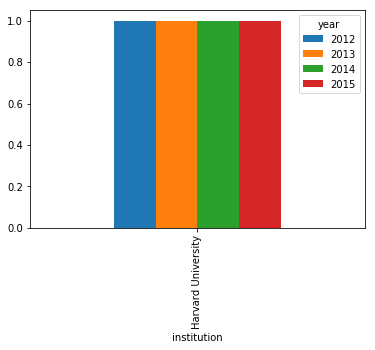

In [37]:
cwur_same_rank_pvt.head(20).plot.bar()

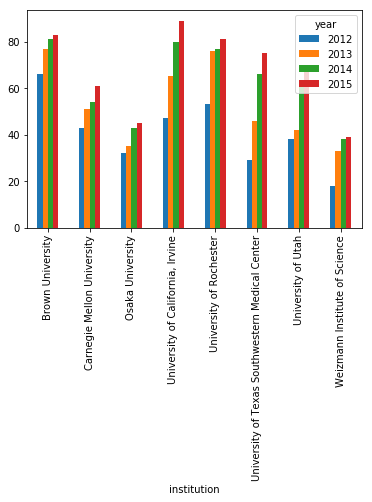

In [38]:
cwur_decreasing_rank_pvt.plot.bar()

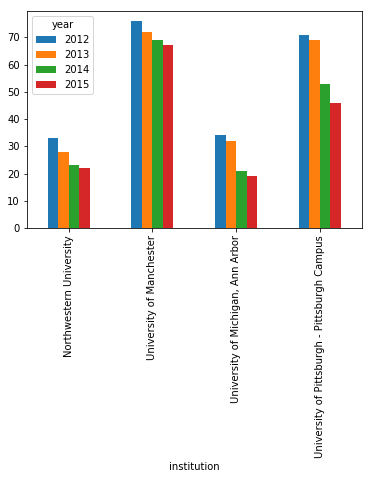

In [39]:
cwur_rising_rank_pvt.plot.bar()

The second table in this block of code (assigned to the variable "consistent_rank") shows the 82 schools that have been consistently ranked across all 4 years in the CWUR data (they ranked somewhere in the top-100 rank for all 4 years with no "NaN"). The 40 schools that were not consistently ranked across all 4 years (they did not rank in the top 100 for at least one year) are listed in "inconsistent_rank_list".

Harvard University was the only university whose rank remained stationary across all 4 years in the CWUR data.

The following 8 schools had decreasing world ranks from 2012 to 2015:
- Brown University
- Carnegie Mellon University
- Osaka University
- University of California, Irvine
- University of Rochester
- University of Texas Southwestern Medical Center
- University of Utah
- Weizmann Institute of Science

The following 4 schools had rising world ranks from 2012 to 2015:
- Northwestern University
- University of Manchester
- University of Michigan, Ann Arbor
- University of Pittsburgh - Pittsburgh Campus

The 3 trends of schools with stationary, rising, and falling world ranks is supported by the 3 above boxplots, which shows the individual world ranks per year for each school


### For 10 Points: Using the education expenditure data, identify the nations that spent below the average of the OECD for Higher Education Institutions in 2000, but above the average in 2010.

* Sort the nations by difference between 2000 and 2010
* Plot the lag, and explain your answers.

In [40]:
education_df = pd.read_csv("data/education_expenditure_supplementary_data.csv", lineterminator='\n')
education_df
education_df['institute_type'] = education_df['institute_type'].apply(lambda x: x.strip())
education_df['direct_expenditure_type'] = education_df['direct_expenditure_type'].apply(lambda x: x.strip())
education_df = education_df.rename(columns={'1995': 'avg_1995', '2000': 'avg_2000', 
    '2005': 'avg_2005', '2009': 'avg_2009', '2010': 'avg_2010', '2011': 'avg_2011'})
education_df
higher_ed_inst = education_df[(education_df.institute_type == 'Higher Education Institutions') 
    & (education_df.direct_expenditure_type == 'Public')]
higher_ed_inst
nation_spend = higher_ed_inst[(higher_ed_inst.avg_2000 < 1.0) & (higher_ed_inst.avg_2010 > 1.1)]
nation_spend

# times_df['new_fm_ratio'] = times_df['female'].astype(str).astype(float)/times_df['male'].astype(str).astype(float)
# no nations met both expenditure metrics



,country,institute_type,direct_expenditure_type,avg_1995,avg_2000,avg_2005,avg_2009,avg_2010,avg_2011


(Use this space to explain your answers)

In [41]:
higher_ed_inst["spending_lag"] = higher_ed_inst.avg_2010 - higher_ed_inst.avg_2000
higher_ed_inst.head()


/Users/shruthisubramaniam/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,institute_type,direct_expenditure_type,avg_1995,avg_2000,avg_2005,avg_2009,avg_2010,avg_2011,spending_lag
74,OECD Average,Higher Education Institutions,Public,0.9,1.0,1.0,1.1,1.1,1.1,0.1
75,Australia,Higher Education Institutions,Public,1.2,0.8,0.8,0.7,0.8,0.7,0.0
76,Austria,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.5,1.4,0.3
77,Belgium,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.4,1.3,0.2
78,Canada,Higher Education Institutions,Public,1.5,1.6,1.5,1.5,1.6,NaN,0.0


In [42]:
higher_ed_inst.sort_values("spending_lag")

,country,institute_type,direct_expenditure_type,avg_1995,avg_2000,avg_2005,avg_2009,avg_2010,avg_2011,spending_lag
90,Israel,Higher Education Institutions,Public,NaN,1.1,1.0,1.0,1.0,0.9,-0.1
87,Hungary,Higher Education Institutions,Public,0.8,0.9,0.9,1.0,0.8,1.0,-0.1
75,Australia,Higher Education Institutions,Public,1.2,0.8,0.8,0.7,0.8,0.7,0.0
107,United Kingdom,Higher Education Institutions,Public,0.7,0.7,0.9,0.6,0.7,0.9,0.0
78,Canada,Higher Education Institutions,Public,1.5,1.6,1.5,1.5,1.6,NaN,0.0
101,Slovak Republic,Higher Education Institutions,Public,NaN,0.7,0.7,0.7,0.7,0.8,0.0
100,Portugal,Higher Education Institutions,Public,1.0,1.0,0.9,1.0,1.0,1.0,0.0
92,Japan,Higher Education Institutions,Public,0.4,0.5,0.5,0.5,0.5,0.5,0.0
97,New Zealand,Higher Education Institutions,Public,1.1,0.9,0.9,1.1,1.0,1.0,0.1
93,"Korea, Republic of",Higher Education Institutions,Public,0.3,0.6,0.6,0.7,0.7,0.7,0.1


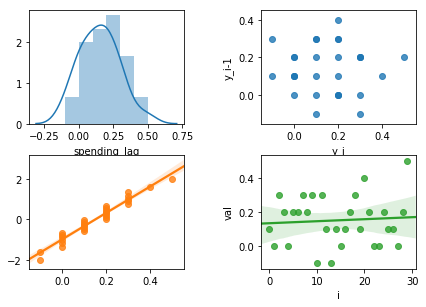

In [43]:
multiplePlots(higher_ed_inst['spending_lag'].dropna())
# plotting the lag 


No countries met both conditions of spending less than the OECD in 2000 but greater than the OECD in 2010. Israel and Hungary were the only 2 countries to have a lower percentage of their GDP dedicated towards public education expenditures in 2010 compared to 2000. The Russian Federation increased their GDP allocations the most in 2010

The difference in percentage of education spending between 2010 and 2000 was assigned to a new column called "spending_lag", seen in the above table output. The distribution of this difference appareas to be normal per the histogram and the run sequence, since there is no obviouse skewedness and the run sequence plot does not have a clear slope. However, the randomoness assumption does not hold since there appears to be a trend to the lag plot distribution, however this could also be due to the small scale of the percentage differences.

### For 10 Points: Using the Times ranking, look at how the Female : Male ratio (`female_male_ratio` column) changes over time.

What were the distributions like in the year 2011 and 2016? How have these distributions changed?

You may want to convert the column values to an easier-to-understand measure, such as a percentage or the ratio of female students (the first numeric value in the ratio entry).

In [44]:
times_df['female_male_ratio'] = times_df['female_male_ratio'].str.split(':')
times_df['female'] = times_df['female_male_ratio'].str[0]
times_df['female'] = times_df['female'].replace('-','NaN')
times_df['male'] = times_df['female_male_ratio'].str[1]
times_df['male'] = times_df['male'].replace('-','NaN')

times_df['new_fm_ratio'] = times_df['female'].astype(str).astype(float)/times_df['male'].astype(str).astype(float)
times_df['new_fm_ratio'] = times_df['new_fm_ratio'].round(2)
times_df['new_fm_ratio'] = times_df['new_fm_ratio'].replace([np.inf, -np.inf], np.nan)

# .apply(lambda x:x[0]).strip.astype(int)

#times_data['female_male_ratio'] = times_data['female_male_ratio'].str.split(':')
#times_data['female'] = times_data['female_male_ratio'].str[0]
#times_data['male'] = times_data['female_male_ratio'].str[1]
#times_df



# df["normalized-losses"]=df["normalized-losses"].astype(int)




In [45]:
times_df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,female,male,new_fm_ratio
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152,8.9,25%,NaN,2011,NaN,NaN,NaN
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,27%,"[33 , 67]",2011,33,67,0.49
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,33%,"[37 , 63]",2011,37,63,0.59
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,22%,"[42 , 58]",2011,42,58,0.72
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929,8.4,27%,"[45 , 55]",2011,45,55,0.82


In [46]:
times_2011_ratio = times_df[times_df.year == 2011]
times_2011_ratio.head()
times_2016_ratio = times_df[times_df.year == 2016]
times_2016_ratio.head()




,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,female,male,new_fm_ratio
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243,6.9,27%,"[33 , 67]",2016,33,67,0.49
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919,11.6,34%,"[46 , 54]",2016,46,54,0.85
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596,7.8,22%,"[42 , 58]",2016,42,58,0.72
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812,11.8,34%,"[46 , 54]",2016,46,54,0.85
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074,9.0,33%,"[37 , 63]",2016,37,63,0.59


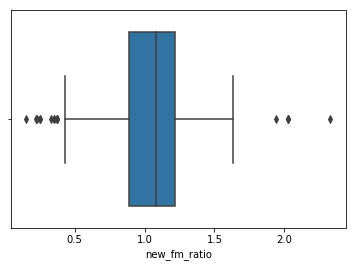

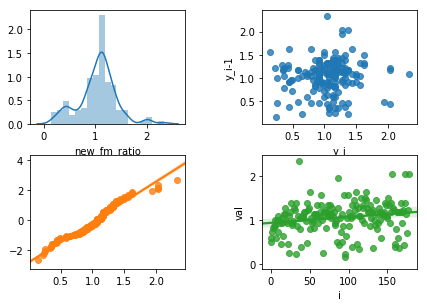

In [47]:
sns.boxplot(times_2011_ratio['new_fm_ratio'])
multiplePlots(times_2011_ratio['new_fm_ratio'].dropna())

In [48]:
times_2011_ratio['new_fm_ratio'].describe()

count    178.000000
mean       1.046067
std        0.362298
min        0.150000
25%        0.890000
50%        1.080000
75%        1.220000
max        2.330000
Name: new_fm_ratio, dtype: float64

In [49]:
times_2016_ratio.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,female,male,new_fm_ratio
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243,6.9,27%,"[33 , 67]",2016,33,67,0.49
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919,11.6,34%,"[46 , 54]",2016,46,54,0.85
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596,7.8,22%,"[42 , 58]",2016,42,58,0.72
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812,11.8,34%,"[46 , 54]",2016,46,54,0.85
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074,9.0,33%,"[37 , 63]",2016,37,63,0.59


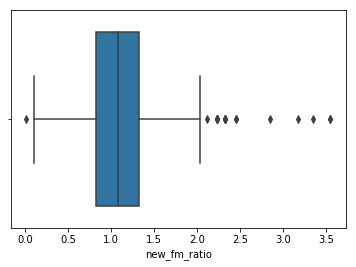

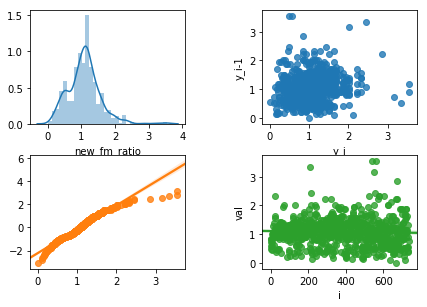

In [50]:
sns.boxplot(times_2016_ratio['new_fm_ratio'])
multiplePlots(times_2016_ratio['new_fm_ratio'].dropna())

In [51]:
times_2016_ratio['new_fm_ratio'].describe()

count    735.000000
mean       1.081932
std        0.472042
min        0.010000
25%        0.820000
50%        1.080000
75%        1.330000
max        3.550000
Name: new_fm_ratio, dtype: float64

A new column called "new_fm_ratio" was added which calculates the ratio of female to male students per university as #female students/#male students.
The mean value in 2011 for this ratio was 1.05, which indicates that there was roughly the same number of female students to male students on average that year. The range for the 2011 ratio was 0.15 to 2.33. The distribution of this ratio was fairly normal per the histogram and the run sequence plot, which did not have a significant slope. The randomness assumption also appears to hold as there is no clear pattern to the lag plot.

The mean value in 2016 for the female to male ratio was 1.08, which is a 0.3 increse compared to 2011. This indicates that globally, the number of female students per university has increased over those 5 years. The range of the female to male students ratio was 0.01 to 3.55, which is a larger range compared to 2011. The distribution of this ratio in 2016 is right-skewed, as evidenced by the histogram and QQ plot which exhibits a right tail.


### *Bonus* – For 5 Points: Which, if any, of the rankings from the Kaggle data set support the claims made in [this Times Higher Education article on public schools](https://www.timeshighereducation.com/student/best-universities/best-public-universities-united-states)?

Justify your claim with specific examples or data.

In [52]:
# put your code here

(Use this space to explain your answers)